In [4]:
#template for data analysis using the CSV files we created

In [5]:
#import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [6]:
#Read in total energy csv file and create data frame
total_energy_df = pd.DataFrame(pd.read_csv('total_renewable_energy.csv'))
#Read in price and create data frame
price_df = pd.DataFrame(pd.read_csv('energyprices.csv'))

#Read in coal generated csv file and create data frame
coal_gen = pd.DataFrame(pd.read_csv('Coal_Generated.csv'))

#Read in coal generated csv file and create data frame
nat_gas_gen = pd.DataFrame(pd.read_csv('Nat_Gas_Generated.csv'))

In [7]:
total_energy_df.head()

,Period,Energy Type,Value,Unit
0,2016,Total Renewable Energy Consumption in Trillion...,10408.662,Trillion Btu
1,2016,Total Renewable Energy Consumed by the Commerc...,242.294,Trillion Btu
2,2016,Total Renewable Energy Consumed by the Electri...,5529.156,Trillion Btu
3,2016,Total Renewable Energy Consumed by the Industr...,2522.887,Trillion Btu
4,2016,Total Renewable Energy Production in Trillion Btu,10477.366,Trillion Btu


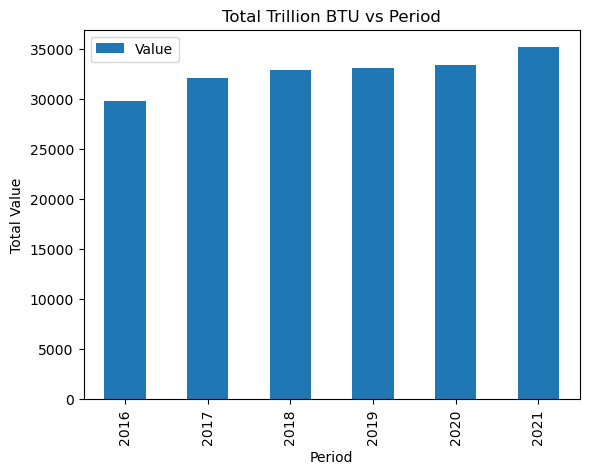

In [8]:
#Create bar graph showing total energy used over 2016-2021
units_df = total_energy_df.sort_values(by=['Unit', 'Period'], ascending=True)

#get the sum per year
barrels_df = units_df[units_df['Unit'] == 'Trillion Btu'].groupby('Period')['Value'].sum().reset_index()
barrels_df.plot(x='Period', y='Value', kind='bar')

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('Total Trillion BTU vs Period')

plt.show()





r-value = 0.940015062885721


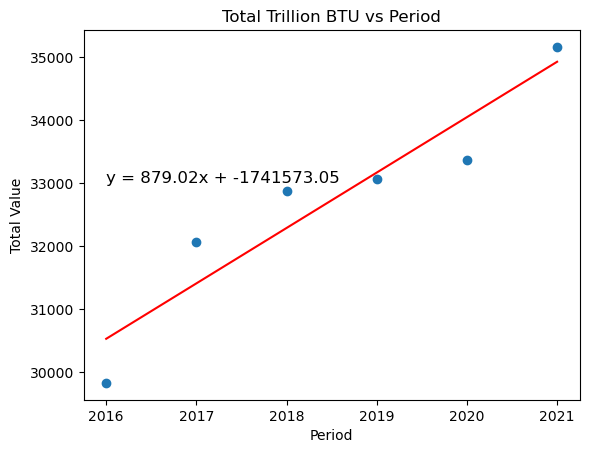

In [9]:
#Create scatter plot with regression line 
units_df = total_energy_df.sort_values(by=['Unit', 'Period'], ascending=True)

# Filter the DataFrame to only include Trillion Btu units and group by period
btu_df = units_df[units_df['Unit'] == 'Trillion Btu'].groupby('Period')['Value'].sum().reset_index()

# Create a scatter plot with Period on the x-axis and Total Value on the y-axis
plt.scatter(x='Period', y='Value', data=btu_df)

plt.xlabel('Period')
plt.ylabel('Total Value')
plt.title('Total Trillion BTU vs Period')

m, b, r, _, _ = linregress(btu_df['Period'], btu_df['Value'])
plt.plot(btu_df['Period'], m*btu_df['Period'] + b, color='red')
plt.text(2016, 33000, f'y = {m:.2f}x + {b:.2f}', fontsize=12)


print(f'r-value = {r}')


plt.show()


In [10]:
#repeat above for Hydro, Solar, wind

In [11]:
hydro_df = pd.DataFrame(pd.read_csv('Hydro.csv'))
hydro_df

,Period,Energy Type,Use,Unit
0,2016,conventional hydroelectric,1902.571,thousand megawatthours
1,2017,conventional hydroelectric,1897.228,thousand megawatthours
2,2018,conventional hydroelectric,1825.385,thousand megawatthours
3,2019,conventional hydroelectric,1811.001,thousand megawatthours
4,2020,conventional hydroelectric,1668.561,thousand megawatthours
5,2021,conventional hydroelectric,1598.310,thousand megawatthours


In [12]:
solar_df = pd.DataFrame(pd.read_csv('Solar.csv'))
solar_df

,Period,Energy Type,Use,Unit
0,2016,estimated total solar,999.12099,thousand megawatthours
1,2017,estimated total solar,1485.13282,thousand megawatthours
2,2018,estimated total solar,1652.53998,thousand megawatthours
3,2019,estimated total solar,1851.65606,thousand megawatthours
4,2020,estimated total solar,2204.37961,thousand megawatthours
5,2021,estimated total solar,2786.11122,thousand megawatthours


In [13]:
wind_df = pd.DataFrame(pd.read_csv('Wind.csv'))
wind_df

,Period,Energy Type,Use,Unit
0,2016,wind,9421.20400,thousand megawatthours
1,2017,wind,9314.66295,thousand megawatthours
2,2018,wind,9745.15000,thousand megawatthours
3,2019,wind,10852.37576,thousand megawatthours
4,2020,wind,13386.22800,thousand megawatthours
5,2021,wind,15125.69700,thousand megawatthours


In [14]:
#line plot showing each three on the same chart

In [15]:
hydro_energy_df = pd.DataFrame(pd.read_csv('Hydro_energy_generation.csv'))
hydro_energy_df.head()

,Fuel Type,Energy Generation,Energy Units,Location,Period
0,conventional hydroelectric,125.62245,thousand megawatthours,CO,2023-01
1,conventional hydroelectric,103.99342,thousand megawatthours,CO,2022-12
2,conventional hydroelectric,100.08033,thousand megawatthours,CO,2022-11
3,conventional hydroelectric,81.41010,thousand megawatthours,CO,2022-10
4,conventional hydroelectric,98.96762,thousand megawatthours,CO,2022-09


In [21]:
renewable_energy_df = pd.DataFrame(pd.read_csv('Renewable_energy_generation.csv'))
renewable_energy_df.head()

,Fuel Type,Energy Generation,Energy Units,Location,Period
0,biomass,10.75141,thousand megawatthours,CO,2023-01
1,wood and wood wastes,3.92300,thousand megawatthours,CO,2023-01
2,onshore wind turbine,1283.14071,thousand megawatthours,CO,2023-01
3,wind,1283.14071,thousand megawatthours,CO,2023-01
4,renewable waste products,6.82841,thousand megawatthours,CO,2023-01


In [17]:
renewable_energy_df['Fuel Type'].nunique()

11

In [18]:
#repeat above to compare with Coal & Natural Gas

#Coal

coal_df = pd.DataFrame(pd.read_csv('Coal_Generated.csv'))
coal_df

,Fuel Type,Amount Generated,Units Measured,Period
0,all coal products,29948.67505,thousand megawatthours,2016
1,all coal products,29242.21643,thousand megawatthours,2017
2,all coal products,26382.06016,thousand megawatthours,2018
3,all coal products,25320.50278,thousand megawatthours,2019
4,all coal products,19478.40504,thousand megawatthours,2020
5,all coal products,23602.04163,thousand megawatthours,2021
6,all coal products,21723.00385,thousand megawatthours,2022


In [19]:
#Natural Gas

nat_gas_df = pd.DataFrame(pd.read_csv('Nat_Gas_Generated.csv'))
nat_gas_df

,Fuel Type,Amount Generated,Units Measured,Period
0,natural gas,12679.43938,thousand megawatthours,2016
1,natural gas,12532.24249,thousand megawatthours,2017
2,natural gas,16398.43941,thousand megawatthours,2018
3,natural gas,17097.11593,thousand megawatthours,2019
4,natural gas,18171.33776,thousand megawatthours,2020
5,natural gas,14559.77311,thousand megawatthours,2021
6,natural gas,15612.43366,thousand megawatthours,2022
